### Stock Analysis

The key idea is to use financial statements, news, tweets, forumns to dictate Share price. So we need to do the following
* WebScrape:
    * financial statements
    * share price
    * tweets
    * news
* Pre-process & clean:
* EDA:
* Sentiment Analysis on: news, tweets, and forumns
* check for significance of attributes

## WebScrape

In [1]:
# These codes are taken with reference to https://towardsdatascience.com/web-scraping-for-accounting-analysis-using-python-part-1-b5fc016a1c9a

import pandas as pd
from bs4 import BeautifulSoup
import urllib.request as ur

In [2]:
# Enter a stock symbol
index= 'QAN.AX'
# URL link 
url_is = 'https://sg.finance.yahoo.com/quote/' + index + '/financials?p=' + index
url_bs = 'https://sg.finance.yahoo.com/quote/' + index +'/balance-sheet?p=' + index
url_cf = 'https://sg.finance.yahoo.com/quote/' + index + '/cash-flow?p='+ index

In [3]:
#Read the data
read_data_is = ur.urlopen(url_is).read() 
read_data_bs = ur.urlopen(url_bs).read()
read_data_cf = ur.urlopen(url_cf).read()

soup_is= BeautifulSoup(read_data_is,'lxml')
soup_bs= BeautifulSoup(read_data_bs,'lxml')
soup_cf= BeautifulSoup(read_data_cf,'lxml')

In [4]:
def ex_dat(emp_ls, soup_data, num_col):
    for i in soup_data.find_all('div'):
        emp_ls.append(i.string)
#     emp_ls = [e for e in emp_ls if e not in ('Operating Expenses', 'Non-recurring Events')]
    # Remove non div
    emp_ls = list(filter(None,emp_ls))
    
    # Remove non important scraped data
    emp_ls = emp_ls[10:]
    
    # Remove the 'Quarterly'
    emp_ls.pop(1)
    emp_ls = list(zip(*[iter(emp_ls)]*num_col))
    df = pd.DataFrame(emp_ls[0:])
    df.drop(df.tail(1).index, inplace=True)
    
    
    df.columns = df.iloc[0] # Name columns to first row of dataframe
    df = df.iloc[1:,] # start to read 1st row
    df = df.T # transpose dataframe

    df.columns = df.iloc[0] #Name columns to first row of dataframe
    df.drop(df.index[0],inplace=True) #Drop first index row
    
    df.index.name = '' # Remove the index name
    
    return df

In [5]:
ls_is = [] # Create empty list
ls_bs = []
ls_cf = []


for l in soup_is.find_all('div'): 
  #Find all data structure that is ‘div’
  ls_is.append(l.string) # add each element one by one to the list

    
ls_is = [e for e in ls_is if e not in ('Operating Expenses','Non-recurring Events')] # Exclude those columns 

In [6]:
ls_bs = ex_dat(ls_bs, soup_bs, 5)
ls_cf = ex_dat(ls_cf, soup_cf, 6)

In [7]:
ls_bs


Annual,Cash and cash equivalents,Other short-term investments,Total cash,Net receivables,Inventory,Other current assets,Total current assets,"Gross property, plant and equipment",Accumulated depreciation,"Net property, plant and equipment",...,Deferred tax liabilities,Deferred revenues,Other long-term liabilities,Total non-current liabilities,Total liabilities,Common stock,Retained earnings,Accumulated other comprehensive income,Total stockholders' equity,Total liabilities and stockholders' equity
,,,,,,,,,,,,,,,,,,,,,
30/06/2020,"3,520,000","216,000","3,736,000","335,000","306,000","72,000","4,952,000","30,697,000","-17,531,000","13,166,000",...,-,"2,256,000","47,000","10,196,000","18,500,000","3,053,000","-1,357,000","-173,000","1,523,000","20,026,000"
30/06/2019,"2,157,000","334,000","2,491,000","975,000","364,000","75,000","4,193,000","27,850,000","-14,873,000","12,977,000",...,"847,000","1,466,000","48,000","7,365,000","15,941,000","1,719,000","1,603,000","111,000","3,433,000","19,377,000"
30/06/2018,"1,694,000","474,000","2,168,000","908,000","351,000","167,000","3,712,000","12,851,000",-,"12,851,000",...,"910,000","1,446,000","25,000","7,092,000","14,688,000","2,393,000","1,084,000","479,000","3,956,000","18,647,000"
30/06/2017,"1,775,000","100,000","1,775,000","666,000","351,000","97,000","3,119,000","25,940,000","-13,687,000","12,253,000",...,"353,000","1,424,000","56,000","6,586,000","13,681,000","3,053,000","472,000","12,000","3,537,000","17,221,000"


In [8]:
ls_cf

Annual,"Investments in property, plant and equipment","Acquisitions, net",Purchases of investments,Sales/maturities of investments,Other investing activities,Net cash used for investing activities,Debt repayment,Common stock issued,Common stock repurchased,Dividends paid,Other financing activities,Net cash used provided by (used for) financing activities,Net change in cash,Cash at beginning of period,Cash at end of period,Capital expenditure,Free cash flow
,,,,,,,,,,,,,,,,,
ttm,"-1,944,000",-,"-60,000",-,"-130,000","-1,651,000","-744,000","1,342,000","-735,000","-363,000","-367,000","-705,000","451,000","1,694,000","2,157,000","-1,944,000","863,000"
30/06/2020,"-1,549,000",-,"-24,000",-,"-48,000","-1,571,000","-625,000","1,342,000","-448,000","-204,000","-367,000","1,853,000","1,365,000","2,157,000","3,520,000","-1,549,000","-466,000"
30/06/2019,"-1,944,000",-,"-60,000",-,"-130,000","-1,651,000","-744,000",-,"-735,000","-363,000",-,"-705,000","451,000","1,694,000","2,157,000","-1,944,000","863,000"
30/06/2018,"-1,959,000",-,"-2,000",-,"-274,000","-2,201,000","-802,000",-,"-913,000","-249,000",-,"-1,296,000","-84,000","1,775,000","1,694,000","-1,959,000","1,454,000"
30/06/2017,"-1,368,000",0,"-16,000",0,"-696,000","-2,046,000","-453,000",-,"-564,000","-264,000","8,000","-854,000","-196,000","1,980,000","1,775,000","-1,368,000","1,336,000"


In [9]:
ls_is = list(filter(None,ls_is))

In [10]:
ls_is

["No matching results for ''",
 'Tip: Try a valid symbol or a specific company name for relevant results',
 ' react-empty: 2 ',
 ' react-empty: 2 ',
 'Qantas Airways Limited (QAN.AX)',
 'ASX - ASX Delayed Price. Currency in AUD',
 'At close:  4:10PM AEDT',
 'Income statement',
 'Balance sheet',
 'Cash flow',
 'Annual',
 'Quarterly',
 'ttm',
 '30/06/2020',
 '30/06/2019',
 '30/06/2018',
 '30/06/2017',
 'Total revenue',
 '17,597,000',
 '14,054,000',
 '17,597,000',
 '16,628,000',
 '15,680,000',
 'Cost of revenue',
 '7,841,000',
 '6,415,000',
 '7,841,000',
 '6,828,000',
 '6,475,000',
 'Gross profit',
 '9,756,000',
 '7,639,000',
 '9,756,000',
 '9,800,000',
 '9,205,000',
 'Selling general and administrative',
 '5,514,000',
 '4,287,000',
 '5,514,000',
 '5,500,000',
 '5,335,000',
 'Total operating expenses',
 '8,888,000',
 '8,212,000',
 '8,888,000',
 '8,639,000',
 '8,174,000',
 'Operating income or loss',
 '868,000',
 '-573,000',
 '868,000',
 '1,161,000',
 '1,031,000',
 'Interest expense',
 '23

In [11]:
ls_is = ls_is[10:]

In [12]:
ls_is.pop(1)
ls_is


['Annual',
 'ttm',
 '30/06/2020',
 '30/06/2019',
 '30/06/2018',
 '30/06/2017',
 'Total revenue',
 '17,597,000',
 '14,054,000',
 '17,597,000',
 '16,628,000',
 '15,680,000',
 'Cost of revenue',
 '7,841,000',
 '6,415,000',
 '7,841,000',
 '6,828,000',
 '6,475,000',
 'Gross profit',
 '9,756,000',
 '7,639,000',
 '9,756,000',
 '9,800,000',
 '9,205,000',
 'Selling general and administrative',
 '5,514,000',
 '4,287,000',
 '5,514,000',
 '5,500,000',
 '5,335,000',
 'Total operating expenses',
 '8,888,000',
 '8,212,000',
 '8,888,000',
 '8,639,000',
 '8,174,000',
 'Operating income or loss',
 '868,000',
 '-573,000',
 '868,000',
 '1,161,000',
 '1,031,000',
 'Interest expense',
 '232,000',
 '208,000',
 '232,000',
 '230,000',
 '235,000',
 'Total other income/expenses net',
 '582,000',
 '-1,864,000',
 '582,000',
 '412,000',
 '346,000',
 'Income before tax',
 '1,265,000',
 '-2,708,000',
 '1,265,000',
 '1,391,000',
 '1,181,000',
 'Income tax expense',
 '374,000',
 '-744,000',
 '374,000',
 '411,000',
 '32

In [13]:
is_data = list(zip(*[iter(ls_is)]*6))

In [14]:
is_data

[('Annual', 'ttm', '30/06/2020', '30/06/2019', '30/06/2018', '30/06/2017'),
 ('Total revenue',
  '17,597,000',
  '14,054,000',
  '17,597,000',
  '16,628,000',
  '15,680,000'),
 ('Cost of revenue',
  '7,841,000',
  '6,415,000',
  '7,841,000',
  '6,828,000',
  '6,475,000'),
 ('Gross profit',
  '9,756,000',
  '7,639,000',
  '9,756,000',
  '9,800,000',
  '9,205,000'),
 ('Selling general and administrative',
  '5,514,000',
  '4,287,000',
  '5,514,000',
  '5,500,000',
  '5,335,000'),
 ('Total operating expenses',
  '8,888,000',
  '8,212,000',
  '8,888,000',
  '8,639,000',
  '8,174,000'),
 ('Operating income or loss',
  '868,000',
  '-573,000',
  '868,000',
  '1,161,000',
  '1,031,000'),
 ('Interest expense', '232,000', '208,000', '232,000', '230,000', '235,000'),
 ('Total other income/expenses net',
  '582,000',
  '-1,864,000',
  '582,000',
  '412,000',
  '346,000'),
 ('Income before tax',
  '1,265,000',
  '-2,708,000',
  '1,265,000',
  '1,391,000',
  '1,181,000'),
 ('Income tax expense',
  

In [15]:
income_stat = pd.DataFrame(is_data[0:])

In [16]:
income_stat

,0,1,2,3,4,5
0,Annual,ttm,30/06/2020,30/06/2019,30/06/2018,30/06/2017
1,Total revenue,"17,597,000","14,054,000","17,597,000","16,628,000","15,680,000"
2,Cost of revenue,"7,841,000","6,415,000","7,841,000","6,828,000","6,475,000"
3,Gross profit,"9,756,000","7,639,000","9,756,000","9,800,000","9,205,000"
4,Selling general and administrative,"5,514,000","4,287,000","5,514,000","5,500,000","5,335,000"
5,Total operating expenses,"8,888,000","8,212,000","8,888,000","8,639,000","8,174,000"
6,Operating income or loss,"868,000","-573,000","868,000","1,161,000","1,031,000"
7,Interest expense,"232,000","208,000","232,000","230,000","235,000"
8,Total other income/expenses net,"582,000","-1,864,000","582,000","412,000","346,000"
9,Income before tax,"1,265,000","-2,708,000","1,265,000","1,391,000","1,181,000"


In [17]:
# remove the last row 

income_stat.drop(income_stat.tail(1).index, inplace=True)

In [18]:
income_stat.columns = income_stat.iloc[0] # Name columns to first row of dataframe
income_stat = income_stat.iloc[1:,] # start to read 1st row
income_stat = income_stat.T # transpose dataframe

income_stat.columns = income_stat.iloc[0] #Name columns to first row of dataframe
income_stat.drop(income_stat.index[0],inplace=True) #Drop first index row
# Income_st.index.name = ‘’ # Remove the index name
# Income_st.rename(index={‘ttm’: ‘12/31/2019’},inplace=True) #Rename ttm in index columns to end of the year
# Income_st = Income_st[Income_st.columns[:-5]] # remove last 5 irrelevant columns

In [19]:
income_stat

Annual,Total revenue,Cost of revenue,Gross profit,Selling general and administrative,Total operating expenses,Operating income or loss,Interest expense,Total other income/expenses net,Income before tax,Income tax expense,Income from continuing operations,Net income,Net income available to common shareholders,Basic EPS,Diluted EPS,Basic average shares,Diluted average shares,EBITDA
0,,,,,,,,,,,,,,,,,,
ttm,"17,597,000","7,841,000","9,756,000","5,514,000","8,888,000","868,000","232,000","582,000","1,265,000","374,000","891,000","891,000","891,000",-,-,-,-,-
30/06/2020,"14,054,000","6,415,000","7,639,000","4,287,000","8,212,000","-573,000","208,000","-1,864,000","-2,708,000","-744,000","-1,964,000","-1,964,000","-1,964,000",-,-,-,-,"-455,000"
30/06/2019,"17,597,000","7,841,000","9,756,000","5,514,000","8,888,000","868,000","232,000","582,000","1,265,000","374,000","891,000","891,000","891,000",0.55,0.54,"1,634,000","1,637,868","3,162,000"
30/06/2018,"16,628,000","6,828,000","9,800,000","5,500,000","8,639,000","1,161,000","230,000","412,000","1,391,000","411,000","980,000","980,000","980,000",0.56,0.56,"1,756,000","1,756,000","3,149,000"
30/06/2017,"15,680,000","6,475,000","9,205,000","5,335,000","8,174,000","1,031,000","235,000","346,000","1,181,000","328,000","853,000","852,000","852,000",0.46,0.46,"1,808,226","1,808,226","2,798,000"


In [20]:
income_stat.index.name = '' # Remove the index name

In [21]:
income_stat

Annual,Total revenue,Cost of revenue,Gross profit,Selling general and administrative,Total operating expenses,Operating income or loss,Interest expense,Total other income/expenses net,Income before tax,Income tax expense,Income from continuing operations,Net income,Net income available to common shareholders,Basic EPS,Diluted EPS,Basic average shares,Diluted average shares,EBITDA
,,,,,,,,,,,,,,,,,,
ttm,"17,597,000","7,841,000","9,756,000","5,514,000","8,888,000","868,000","232,000","582,000","1,265,000","374,000","891,000","891,000","891,000",-,-,-,-,-
30/06/2020,"14,054,000","6,415,000","7,639,000","4,287,000","8,212,000","-573,000","208,000","-1,864,000","-2,708,000","-744,000","-1,964,000","-1,964,000","-1,964,000",-,-,-,-,"-455,000"
30/06/2019,"17,597,000","7,841,000","9,756,000","5,514,000","8,888,000","868,000","232,000","582,000","1,265,000","374,000","891,000","891,000","891,000",0.55,0.54,"1,634,000","1,637,868","3,162,000"
30/06/2018,"16,628,000","6,828,000","9,800,000","5,500,000","8,639,000","1,161,000","230,000","412,000","1,391,000","411,000","980,000","980,000","980,000",0.56,0.56,"1,756,000","1,756,000","3,149,000"
30/06/2017,"15,680,000","6,475,000","9,205,000","5,335,000","8,174,000","1,031,000","235,000","346,000","1,181,000","328,000","853,000","852,000","852,000",0.46,0.46,"1,808,226","1,808,226","2,798,000"


### Share Price



In [22]:
url_hist = 'https://sg.finance.yahoo.com/quote/'+ index +'/history?p='+ index



In [23]:
import yfinance as yf

In [25]:
ticker = yf.Ticker(index)

qan_df = ticker.history(period="max")

qan_df['Close'].plot(title="QAN's stock price")

In [26]:
qan_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-07-31,1.044109,1.044109,1.044109,1.044109,0.0,0.000,0.0
1995-08-31,1.053821,1.053821,1.053821,1.053821,0.0,0.000,0.0
1995-09-29,1.141236,1.141236,1.141236,1.141236,0.0,0.000,0.0
1995-10-31,1.126666,1.126666,1.126666,1.126666,0.0,0.000,0.0
1995-11-03,NaN,NaN,NaN,NaN,NaN,0.035,0.0


In [28]:
qan_df_drop = qan_df.dropna()

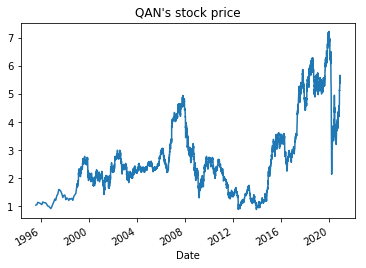

In [29]:
qan_df_drop['Close'].plot(title="QAN's stock price")

In [39]:
# convert Date Column into date time
# qan_df_drop['Date'] = pd.to_datetime(qan_df_drop.Date)

qan_df_drop = qan_df_drop.reset_index()

In [42]:
qan_df_drop.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                 float64
Dividends              float64
Stock Splits           float64
dtype: object

In [41]:
start_date = "2014-12-31"
end_date = "2020-12-31"

after_start_date = qan_df_drop["Date"] >= start_date
before_end_date = qan_df_drop["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = qan_df_drop.loc[between_two_dates]

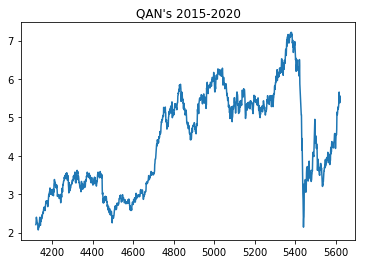

In [43]:
filtered_dates["Close"].plot(title = "QAN's 2015-2020")

In [44]:
import os
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models.widgets import Dropdown
from bokeh.io import curdoc
from bokeh.layouts import column

from bokeh.models import BooleanFilter, CDSView, Select, Range1d, HoverTool
from bokeh.palettes import Category20
from bokeh.models.formatters import NumeralTickFormatter

In [45]:
# def plot_stock_price(stock):
#     p = figure(plot_width=W_PLOT, plot_height=H_PLOT, tools=TOOLS,
#                title="Stock price", toolbar_location='above')

#     inc = stock.data['Close'] > stock.data['Open']
#     dec = stock.data['Open'] > stock.data['Close']
#     view_inc = CDSView(source=stock, filters=[BooleanFilter(inc)])
#     view_dec = CDSView(source=stock, filters=[BooleanFilter(dec)])

#     p.segment(x0='index', x1='index', y0='Low', y1='High', color=RED, source=stock, view=view_inc)
#     p.segment(x0='index', x1='index', y0='Low', y1='High', color=GREEN, source=stock, view=view_dec)

#     p.vbar(x='index', width=VBAR_WIDTH, top='Open', bottom='Close', fill_color=BLUE, line_color=BLUE,
#            source=stock,view=view_inc, name="price")
#     p.vbar(x='index', width=VBAR_WIDTH, top='Open', bottom='Close', fill_color=RED, line_color=RED,
#            source=stock,view=view_dec, name="price")

#     p.legend.location = "top_left"
#     p.legend.border_line_alpha = 0
#     p.legend.background_fill_alpha = 0
#     p.legend.click_policy = "mute"
    
#     return p

In [46]:
# plot_stock_price(qan_df_drop)

NameError: name 'W_PLOT' is not defined

### News

Now we are interested in seeing if news or any significant event would affect the share prices


In [ ]:
# COVID

